**Session 2:** we do analysing for Water withdrawal per capita, and water withdrawal in Total.
* First part: Data Preprocessing, Data Preparation, and Data Exploration about Water Withdrawal Per Capita
* Second part: Modeling for Prediction. Linear Regression and Random Forest Regression method conducts for predicting Water Withdrawal per cap
* Third part: Water withdrawal in Total

## Import libraries

In [98]:
# importing required Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

## Loading dataset

In [99]:
data=pd.read_excel("CFA_data.xlsx")
data.describe(include="all")
data.head()

,Unnamed: 0,population,ppl_den,gdp_per,gdp_agri,gdp_ind,gdp_ser,ws_in,ws_tot,ww_agri,...,ws,wue,wue_agri,wue_ind,wue_ser,wd_tot,wd_rural,wd_urban,country,region
0,0,42228.408,17.730059,4136.289853,2.081500e+10,6.685176e+10,8.017580e+10,266.337296,11.667,6.6710,...,137.920360,14.463198,0.619380,350.377103,22.294463,83.6,81.8,84.3,Algeria,Africa
1,1,98423.598,98.281090,2513.199691,2.803456e+10,8.206749e+10,1.338240e+11,10.160165,57.500,61.3500,...,141.165756,4.584392,0.665586,22.136180,18.132214,99.4,99.0,100.0,Egypt,Africa
2,2,6678.559,3.795628,5312.471944,2.735459e+08,2.001877e+10,1.016851e+10,104.813029,0.700,4.8500,...,817.142857,4.287072,0.018498,58.982461,11.984035,71.2,68.3,72.1,Libya,Africa
3,3,36029.093,80.683222,3258.233846,1.446074e+10,2.759058e+10,6.194435e+10,804.905080,29.000,9.1560,...,50.751212,8.715869,0.432900,126.389217,56.591798,85.4,65.3,98.7,Morocco,Africa
4,4,11565.201,70.687617,3421.777360,3.905261e+09,9.038391e+09,2.443503e+10,362.726078,4.615,2.9326,...,95.998781,10.220137,0.272201,226.554750,32.440686,97.7,93.2,100.0,Tunisia,Africa


In [100]:
data.drop(columns="Unnamed: 0", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  165 non-null    float64
 1   ppl_den     165 non-null    float64
 2   gdp_per     165 non-null    float64
 3   gdp_agri    165 non-null    float64
 4   gdp_ind     165 non-null    float64
 5   gdp_ser     165 non-null    float64
 6   ws_in       165 non-null    float64
 7   ws_tot      165 non-null    float64
 8   ww_agri     165 non-null    float64
 9   ww_ind      165 non-null    float64
 10  ww_mu       165 non-null    float64
 11  ww_tot      165 non-null    float64
 12  ww_per      165 non-null    float64
 13  ww_fresh    165 non-null    float64
 14  ws          165 non-null    float64
 15  wue         165 non-null    float64
 16  wue_agri    165 non-null    float64
 17  wue_ind     165 non-null    float64
 18  wue_ser     165 non-null    float64
 19  wd_tot      165 non-null    f

## Water Withdrawal Per Capita

**Total water withdrawal per capita**

* Definition: Total annual amount of water withdrawn per capita.

* Calculation Criteria:
[Total water withdrawal per capita] = [Total water withdrawal]*1000000/[Total population]

* Unit
m3/year per inhabitant

In [101]:
data["region"].unique()

array(['Africa ', 'Americas ', 'Asia ', 'Oceania ', 'Europe '],
      dtype=object)

**Data Preparation:**

Fill the missing data using the median of the region that a country belongs to, as countries that are close geologically are often similar in many aspects.

In [102]:
data.groupby('region')[["population","ppl_den",'gdp_per',"ws_tot","wue",'ww_per','wd_tot']].median()

,population,ppl_den,gdp_per,ws_tot,wue,ww_per,wd_tot
region,,,,,,,
Africa,14438.8020,53.037748,1321.381592,37.80,10.990217,74.782769,76.50
Americas,10627.1410,49.593472,6827.188847,164.52,13.074402,500.167869,94.90
Asia,19774.1905,108.206902,4241.408290,64.33,6.134966,586.217771,93.75
Europe,8664.1825,103.230444,24745.567088,64.45,60.245673,337.484267,100.00
Oceania,4743.1310,17.717422,43776.465705,327.00,43.051242,697.308780,100.00


In [103]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'ww_per':
        guess_values = data.groupby('region')['ww_per'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('region')[col].median()
    for region in data['region'].unique():
        data[col].loc[(data[col].isnull())&(data['region']==region)] = guess_values[region]

**Data Exploration**
Top Countries with highest Water Withdrawal per capita

Observe the bar graph of the top 20 countries with the highest Water withdrawal per capita. **Turkmenistan** is quite ahead, the next 19 countries are close. **Uruguay**, the 20th still has high water use per capital, and far away capita of the world average.

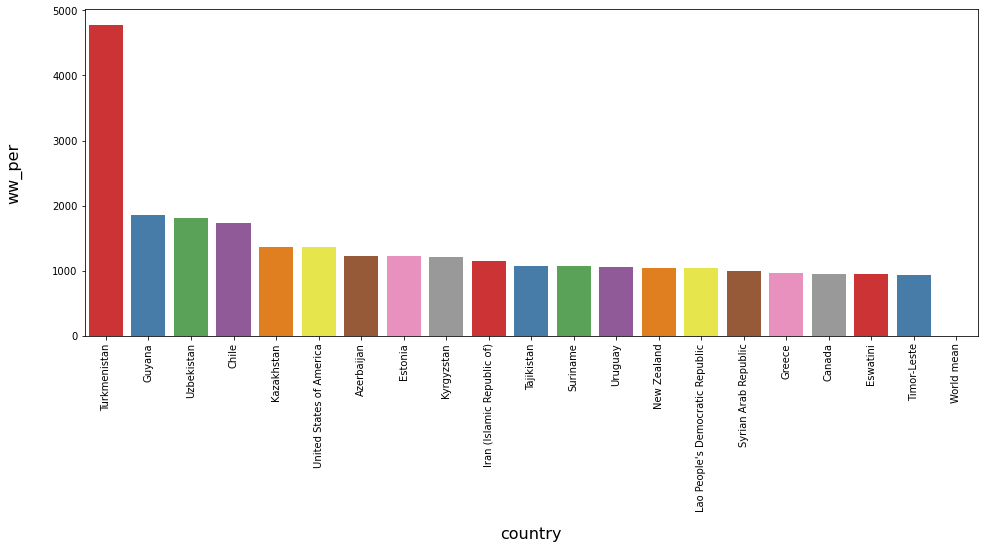

In [104]:
# Top 20 Countries with highest water withdrawal per cap
fig, ax = plt.subplots(figsize=(16,6))
top_ww_countries = data.sort_values('ww_per',ascending=False).head(20)
mean = pd.DataFrame({'country':['World mean'], 'ww_per)':[data['ws'].mean()]})
ww = pd.concat([top_ww_countries[['country','ww_per']],mean],ignore_index=True)

sns.barplot(x='country',y='ww_per',data=ww, palette='Set1')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Turkmenistan is a Asian country with 5,85 miliion of population which is not high population country but this is a highest water withdrawal per capita country in the world. The total water withdrawal of Turkmenistan is (27,954 m3). Comparing with their neighbour is Tajikistan with 9,1 million of populetion but Tajikistan used only 9,774 m3 of water. Turkmenistan used most of their water for agriculture activities (26,36 m3) corresponding to 94.29% of total water withdrawal.

<AxesSubplot:xlabel='region', ylabel='ww_per'>

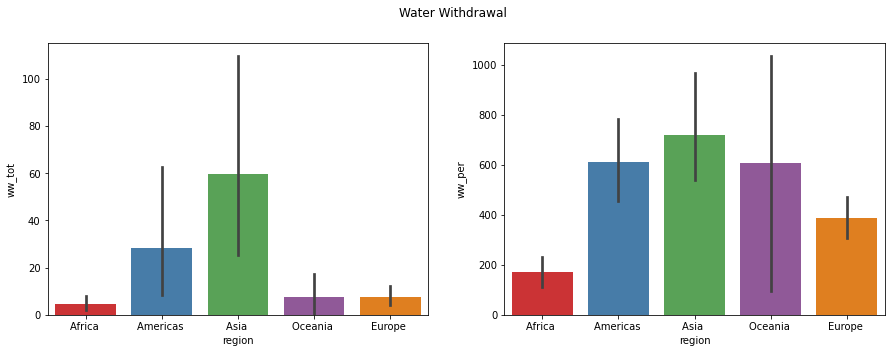

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Water Withdrawal')

# Water withdrawal in total
sns.barplot(ax=axes[0],x='region',y='ww_tot',data=data, palette='Set1')


# Water withdrawal per capita
sns.barplot(ax=axes[1], x='region',y='ww_per',data=data, palette='Set1')



**Correlation between Variables**

The heatmap depicts the correlation between all numerical columns.

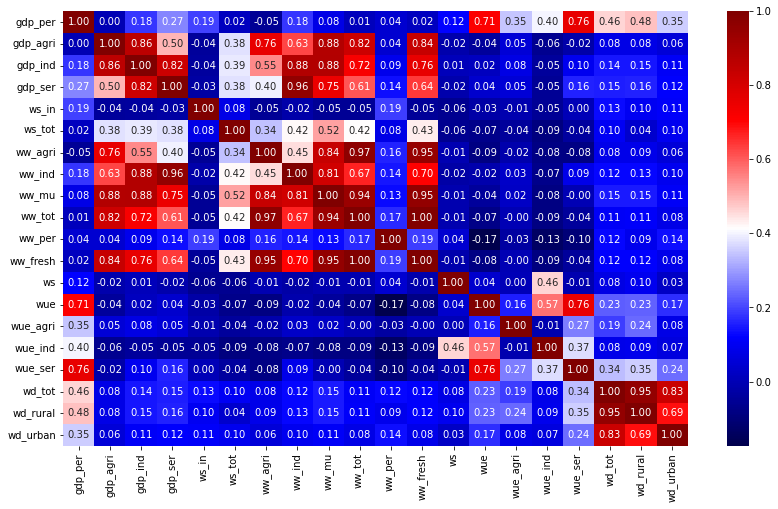

In [106]:
plt.figure(figsize=(14,8))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='seismic')
plt.show()

## Modelling

The first label encodes the categorical features ‘region’

In [107]:
LE = LabelEncoder()
data['region_label'] = LE.fit_transform(data['region'])

data.head()

,population,ppl_den,gdp_per,gdp_agri,gdp_ind,gdp_ser,ws_in,ws_tot,ww_agri,ww_ind,...,wue,wue_agri,wue_ind,wue_ser,wd_tot,wd_rural,wd_urban,country,region,region_label
0,42228.408,17.730059,4136.289853,2.081500e+10,6.685176e+10,8.017580e+10,266.337296,11.667,6.6710,0.19100,...,14.463198,0.619380,350.377103,22.294463,83.6,81.8,84.3,Algeria,Africa,0
1,98423.598,98.281090,2513.199691,2.803456e+10,8.206749e+10,1.338240e+11,10.160165,57.500,61.3500,5.40000,...,4.584392,0.665586,22.136180,18.132214,99.4,99.0,100.0,Egypt,Africa,0
2,6678.559,3.795628,5312.471944,2.735459e+08,2.001877e+10,1.016851e+10,104.813029,0.700,4.8500,0.28000,...,4.287072,0.018498,58.982461,11.984035,71.2,68.3,72.1,Libya,Africa,0
3,36029.093,80.683222,3258.233846,1.446074e+10,2.759058e+10,6.194435e+10,804.905080,29.000,9.1560,0.21200,...,8.715869,0.432900,126.389217,56.591798,85.4,65.3,98.7,Morocco,Africa,0
4,11565.201,70.687617,3421.777360,3.905261e+09,9.038391e+09,2.443503e+10,362.726078,4.615,2.9326,0.04588,...,10.220137,0.272201,226.554750,32.440686,97.7,93.2,100.0,Tunisia,Africa,0


**Training and Testing the data**

In [108]:
data.columns

Index(['population', 'ppl_den', 'gdp_per', 'gdp_agri', 'gdp_ind', 'gdp_ser',
       'ws_in', 'ws_tot', 'ww_agri', 'ww_ind', 'ww_mu', 'ww_tot', 'ww_per',
       'ww_fresh', 'ws', 'wue', 'wue_agri', 'wue_ind', 'wue_ser', 'wd_tot',
       'wd_rural', 'wd_urban', 'country', 'region', 'region_label'],
      dtype='object')

In [109]:
# Training and Testing the data
train, test = train_test_split(data, test_size=0.3, random_state=1, shuffle=True)
training_features = ['population', 'ppl_den', 'gdp_per', 'gdp_agri',
       'gdp_ind', 'gdp_ser', 'ws_in', "ws_tot", 'ww_agri', 'ww_ind', 'ww_mu',
        'ww_tot',"ww_fresh",'ws', 'wue', 'wue_agri', 'wue_ind',
       'wue_ser', 'wd_tot', 'wd_rural', 'wd_urban', 'region_label']
target = 'ww_per'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

First, let’s try the **linear regression** model. As for metrics, we have checked both root mean squared error and mean squared log error.

In [110]:
# linear regression model
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 247.4912083314052 msle_train: 1.3073657779897148
rmse_test: 838.1516891732294 msle_test: 2.5564570984819386


**Performance of Linear Regression model**

In [111]:

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_Y, test_pred_Y))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_Y, test_pred_Y))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_Y, test_pred_Y, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_Y, test_pred_Y))
print('Explained Variance Score:', metrics.explained_variance_score(test_Y, test_pred_Y))
print('Max Error:', metrics.max_error(test_Y, test_pred_Y))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_Y, test_pred_Y))
print('Median Absolute Error:', metrics.median_absolute_error(test_Y, test_pred_Y))
print('R^2:', metrics.r2_score(test_Y, test_pred_Y))



Mean Absolute Error (MAE): 391.9673971237701
Mean Squared Error (MSE): 702498.2540639378
Root Mean Squared Error (RMSE): 838.1516891732294
Mean Absolute Percentage Error (MAPE): 1.7674056008720702
Explained Variance Score: -0.2962635690966078
Max Error: 4257.007475797564
Mean Squared Log Error: 2.5564570984819386
Median Absolute Error: 230.11305734641135
R^2: -0.29642882993526154


Also, as we know the target is not linear with many features, it is worth trying some **nonlinear models**. Like the **random forest model**.

In [112]:
# Random forest model.
model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 167.38462547580278 msle_train: 0.2851107483058667
rmse_test: 615.6766897949743 msle_test: 0.7529662057405555


* Mean squared logarithmic error (MSLE) can be interpreted as a measure of the ratio between the true and predicted values.

* Mean squared logarithmic error is, as the name suggests, a variation of the Mean Squared Error.

* MSLE only care about the percentual difference

The introduction of the logarithm makes MSLE only care about the relative difference between the true and the predicted value, or in other words, it only cares about the percentual difference between them. This means that MSLE will treat small differences between small true and predicted values approximately the same as big differences between large true and predicted values.

**When to use Mean squared logarithmic error**:
Use MSLE when doing regression, believing that your target, conditioned on the input, is normally distributed, and you don’t want large errors to be significantly more penalized than small ones, in those cases where the range of the target value is large.

Example: You want to predict future house prices, and your dataset includes homes that are orders of magnitude different in price. The price is a continuous value, and therefore, we want to do regression. MSLE can here be used as the loss function. The loss is the mean over the seen data of the squared differences between the log-transformed true and predicted values.

In [113]:

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_Y, test_pred_Y))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_Y, test_pred_Y))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_Y, test_pred_Y, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_Y, test_pred_Y))
print('Explained Variance Score:', metrics.explained_variance_score(test_Y, test_pred_Y))
print('Max Error:', metrics.max_error(test_Y, test_pred_Y))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_Y, test_pred_Y))
print('Median Absolute Error:', metrics.median_absolute_error(test_Y, test_pred_Y))
print('R^2:', metrics.r2_score(test_Y, test_pred_Y))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_Y, test_pred_Y))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_Y, test_pred_Y))


Mean Absolute Error (MAE): 283.0210080965905
Mean Squared Error (MSE): 379057.78635689704
Root Mean Squared Error (RMSE): 615.6766897949743
Mean Absolute Percentage Error (MAPE): 1.2200930552730116
Explained Variance Score: 0.3095311274552719
Max Error: 3854.515807798836
Mean Squared Log Error: 0.7529662057405555
Median Absolute Error: 156.35610817112035
R^2: 0.3004659590231583
Mean Poisson Deviance: 312.9629262579827
Mean Gamma Deviance: 0.613326367015659


**Performance of Random Forest Regression model**

In [114]:
#print(test_pred_Y)

**Data Visualization** 

To visualize the data, we made a scatter plot of prediction against actual Water withdrawal. The model gives a reasonable prediction, as the data points are gathered around the line y=x.

C:\Users\user\AppData\Local\Temp\ipykernel_3276\912615278.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_Y = train_Y.append(test_Y)
C:\Users\user\AppData\Local\Temp\ipykernel_3276\912615278.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_pred_Y = train_pred_Y.append(test_pred_Y)


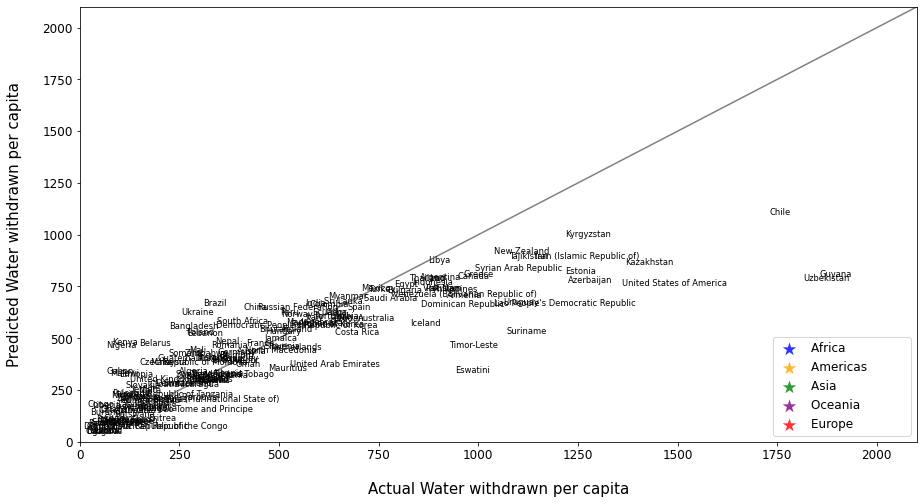

In [115]:
# Visualization of Results
plt.figure(figsize=(15,8))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffled = data.loc[train_test_Y.index]
label = data_shuffled['country']

colors = {'Africa            ':'blue',
          'Americas          ':'orange',
          'Asia              ':'green',
          'Oceania           ':'purple',
          'Europe            ':'red'}

for Region, color in colors.items():
    X = train_test_Y.loc[data_shuffled['region']==Region]
    Y = train_test_pred_Y.loc[data_shuffled['region']==Region]
    ax = sns.regplot(x=X, y=Y, marker='*', fit_reg=False, color=color, scatter_kws={'s':200, 'linewidths':0}, label=Region) 
plt.legend(loc=4,prop={'size': 12})  

ax.set_xlabel('Actual Water withdrawn per capita',labelpad=20)
ax.set_ylabel('Predicted Water withdrawn per capita',labelpad=20)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.tick_params(labelsize=12)

#x = np.linspace(200,50000,100) # 100 linearly spaced numbers
#y = x
plt.plot(x,y,c='gray')

plt.xlim(0,2100)
plt.ylim(0,2100)

for i in range(0,train_test_Y.shape[0]):
     if((data_shuffled['population'].iloc[i]>1e8) |
        (data_shuffled['ww_per'].iloc[i]<2100)):
        plt.text(train_test_Y.iloc[i]+2, train_test_pred_Y.iloc[i]-2, label.iloc[i], size='small')


In [116]:
data_shuffled.head()

,population,ppl_den,gdp_per,gdp_agri,gdp_ind,gdp_ser,ws_in,ws_tot,ww_agri,ww_ind,...,wue,wue_agri,wue_ind,wue_ser,wd_tot,wd_rural,wd_urban,country,region,region_label
28,4666.368,7.490398,473.499434,6.981953e+08,5.564373e+08,9.631520e+08,30216.219552,141.000,0.000400,0.0120,...,18.174045,0.128814,40.205123,13.895263,68.5,54.4,89.6,Central African Republic,Africa,0
56,6465.501,49.593472,2087.250028,2.027589e+09,2.851345e+09,7.114480e+09,24160.540691,164.520,1.185000,0.0736,...,6.783498,0.212292,39.753376,25.525792,87.0,69.4,99.3,Nicaragua,Americas,1
125,4743.131,17.717422,43776.465705,1.099993e+10,3.682095e+10,1.422450e+11,68941.802366,327.000,3.207000,1.1840,...,36.995813,3.860531,29.458808,254.917895,100.0,100.0,100.0,New Zealand,Oceania,4
159,1322.920,29.177768,23528.804365,8.180301e+08,6.305421e+09,1.963923e+10,9607.534847,12.806,0.004739,1.5417,...,13.788121,0.123562,3.496161,270.339896,99.6,99.0,100.0,Estonia,Europe,3
17,3452.786,28.355955,1321.381592,1.208377e+09,1.526766e+09,4.264154e+09,810.939340,7.315,0.550000,0.0010,...,10.956208,0.049675,1673.953805,150.814130,57.8,53.3,73.2,Eritrea,Africa,0


## Total Water Withdrawal Country

Top 10 countries with highest total Water Withdrawal, their Warer Withdrawal make up to about 65.9% of the global GDP.

<Figure size 1152x432 with 0 Axes>

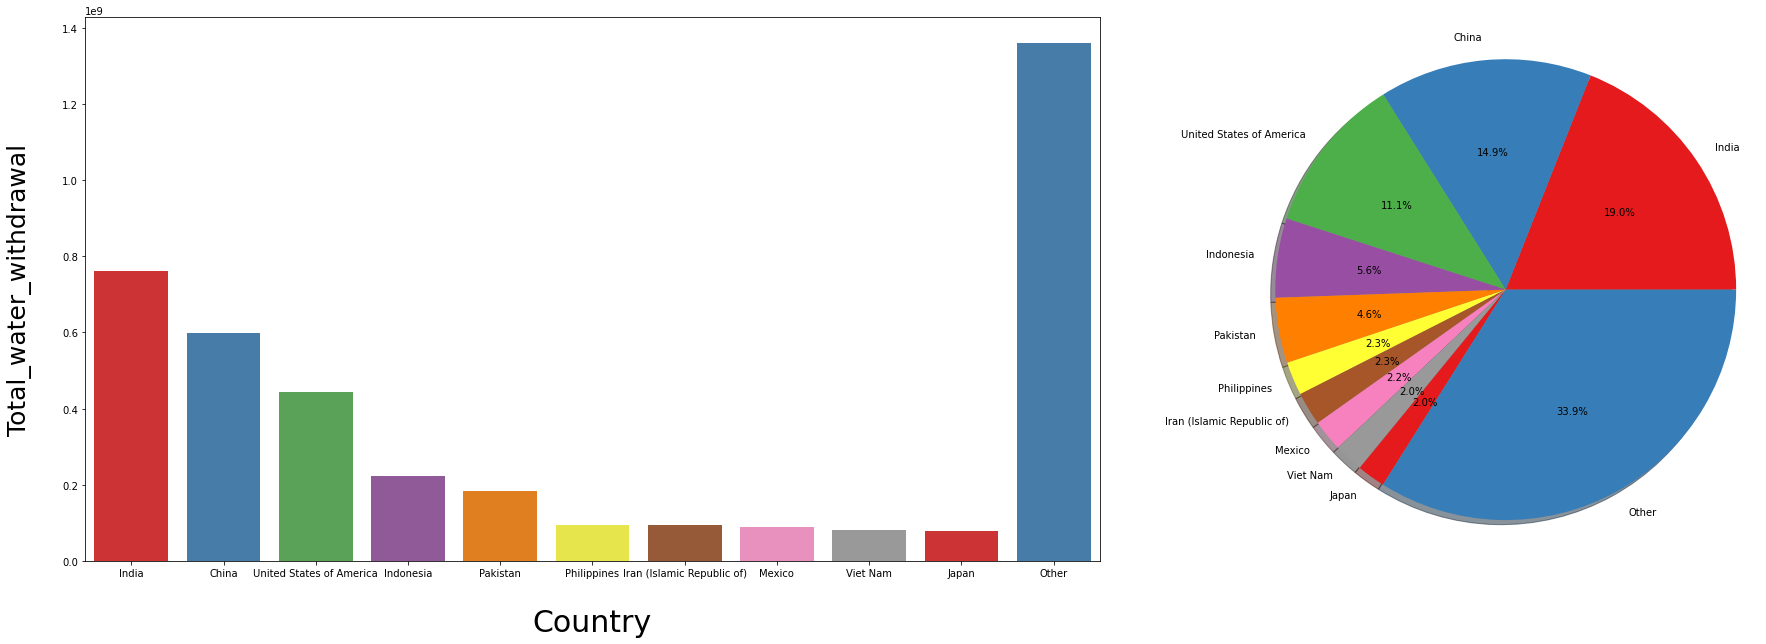

In [117]:
# Top 10 Coutries with highest total GDPs
data['Total_water_withdrawal'] = data['ww_per'] * data['population']
plt.figure(figsize=(16,6))

top_water_use_countries = data.sort_values('Total_water_withdrawal',ascending=False).head(10)
other = pd.DataFrame({'country':['Other'], 'Total_water_withdrawal':[data['Total_water_withdrawal'].sum() - top_water_use_countries['Total_water_withdrawal'].sum()]})
water_use = pd.concat([top_water_use_countries[['country','Total_water_withdrawal']],other],ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10),gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='country',y='Total_water_withdrawal',data=water_use,ax=axes[0],palette='Set1')
axes[0].set_xlabel('Country',labelpad=30,fontsize=30)
axes[0].set_ylabel('Total_water_withdrawal',labelpad=30,fontsize=25)

colors = sns.color_palette("Set1", water_use.shape[0]).as_hex()
axes[1].pie(water_use['Total_water_withdrawal'], labels=water_use['country'],colors=colors,autopct='%1.1f%%',shadow=True)
axes[1].axis('equal')
plt.show()

Compared the above ten countries rank by total Water Withdrawal and Water Withdrawal per capita. We can see the countries with high total water withdrawal are quite different from those with high average Water Withdrawal. China and India jump above a lot when it comes to the total Water Withdrawal. The only country that is in the top 10 for both total and average water withdrawal (7th in Water withdrawal per capita and 3rd in total water withsdrawal) is the United States.



In [118]:
# Compared the above ten countries rank in total water withdrawal and water withdrawal per capita
Rank1 = data[['country','Total_water_withdrawal']].sort_values('Total_water_withdrawal', ascending=False).reset_index()
Rank2 = data[['country','ww_per']].sort_values('ww_per', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('Water withdrawal total      Water withdrawal per capita:')
Rank_change.loc[top_water_use_countries.country]

Water withdrawal total      Water withdrawal per capita:


country
India                         50
China                         66
United States of America       3
Indonesia                     25
Pakistan                      20
Philippines                   16
Iran (Islamic Republic of)     3
Mexico                        29
Viet Nam                      17
Japan                         33
dtype: int64

Finally, we do a comparison of the economic structure for the ten countries with the highest total Water withdrawal

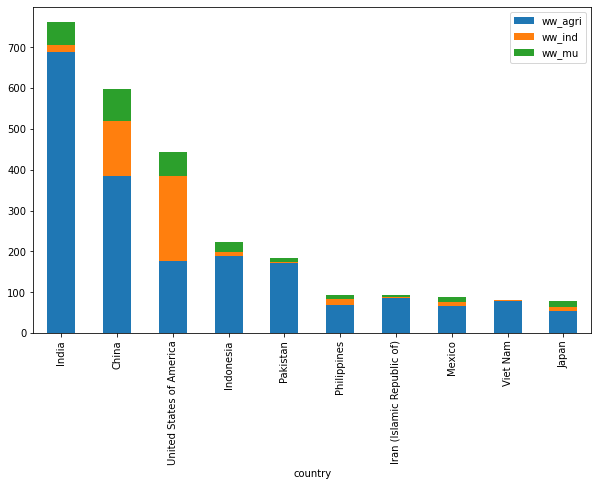

In [119]:
# Comparison of the water withdrawal structure for the Top 10
plot_data = top_water_use_countries.head(10)[['country','ww_agri', 'ww_ind', 'ww_mu']]
plot_data = plot_data.set_index('country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

And, considering the effect GDP structure to water withdrawal

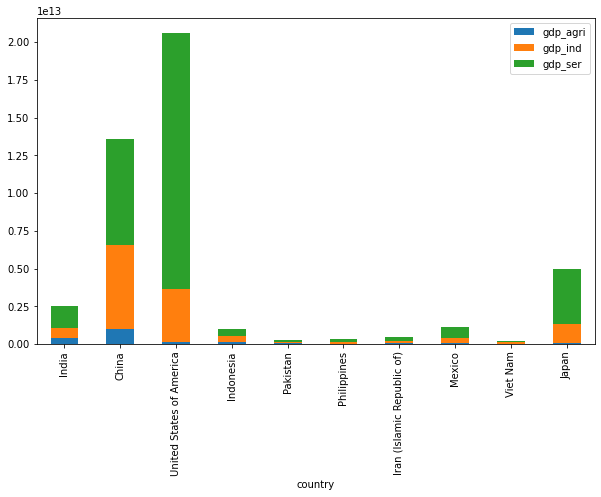

In [120]:
# Comparison of gdp per capital for top 10 countries with highest water withdrawn
plot_data = top_water_use_countries[['country','gdp_agri', 'gdp_ind', 'gdp_ser']]
plot_data = plot_data.set_index('country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

**Using data science in WATER WITHDRAWAL analysis enables us to know the factors that are affecting the Water Withdrawal per capita of various countries.**